# K Means clustering

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 
df = sns.load_dataset('titanic') 
df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
from sklearn.cluster import KMeans
X = df[['age','fare']]
X.age.fillna(value=X['age'].mean(),inplace=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=5)
model.fit(X_scaled)

df['cluster'] = model.labels_



C:\Users\HP\AppData\Local\Temp\ipykernel_4436\586731059.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value=X['age'].mean(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_4436\586731059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value=X['age'].mean(),inplace=True)


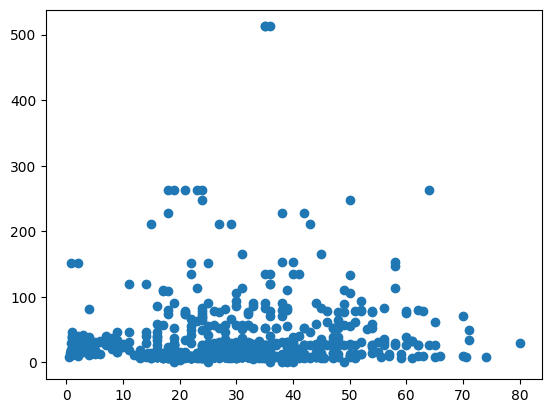

In [9]:
plt.scatter(x=df['age'],y=df['fare'])
plt.show()

In [10]:
plt.scatter(x=df['age'],y=df['fare'],c=df['clusters'],cmap='rainbow')
plt.show()

KeyError: 'clusters'

In [ ]:
fig = px.scatter(df,x='age',y='fare',color='cluster')
fig.show()

In [ ]:
fig = px.scatter_3d(df,x='age',y='fare',color='cluster',z='pclass')
fig.show()

In [ ]:
fig = px.parallel_coordinates(df,title='Titanic cluster density',color='cluster')
fig.show()